<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Load-Training-and-Testing-Sets" data-toc-modified-id="Load-Training-and-Testing-Sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Training and Testing Sets</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Normalize Data</a></span></li></ul></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build Model</a></span><ul class="toc-item"><li><span><a href="#Select-Loss-Function-and-Optimizer" data-toc-modified-id="Select-Loss-Function-and-Optimizer-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Select Loss Function and Optimizer</a></span></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Evaluate-Model-Performance-on-Test-Set" data-toc-modified-id="Evaluate-Model-Performance-on-Test-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate Model Performance on Test Set</a></span></li></ul></div>

# Hello, World!
Most basic of all machine learning problems: MNIST handwritten digit classification.

Following this [Tensorflow tutorial](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb#scrollTo=T4JfEh7kvx6m).

## Import Packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and Keras
import tensorflow as tf

# Helper libraries
import numpy as np

# Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sn    # Heatmap for confusion matrix

## Import Data

In [2]:
mnist = tf.keras.datasets.mnist

### Load Training and Testing Sets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Explore the Data

(60000, 28, 28)
0
255


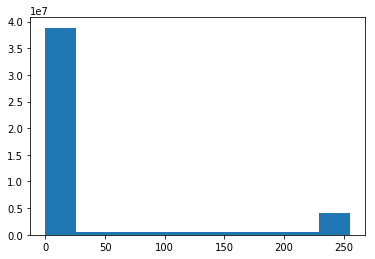

5


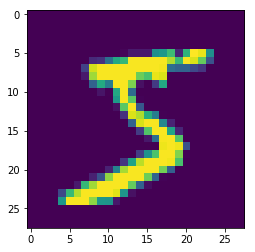

(10000, 28, 28)
0
255


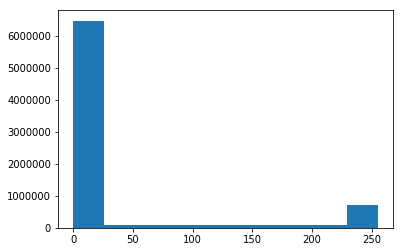

7


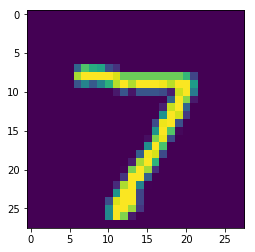

In [4]:
print( x_train.shape )
print( np.min( x_train ) )
print( np.max( x_train ) )

_ = plt.hist(x_train.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_train[0,:,:], interpolation='nearest')
print( y_train[0] )
plt.show()

print( x_test.shape )
print( np.min( x_test ) )
print( np.max( x_test ) )

_ = plt.hist(x_test.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_test[0,:,:], interpolation='nearest')
print( y_test[0] )
plt.show()

### Normalize Data

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build Model

In [6]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),    # Flatten the 28x28 images into a single input column
            tf.keras.layers.Dense(128, activation='relu'),    # First hidden layer of 128 nodes
            tf.keras.layers.Dropout(0.2),                     # Dropout regularization
            tf.keras.layers.Dense(10, activation='softmax')]) # Output softmax layer

### Select Loss Function and Optimizer

In [7]:
model.compile(optimizer='adam',                          # Optimizer favored over standard gradient decent
              loss='sparse_categorical_crossentropy',    # Standard loss for multiclass classification
              metrics=['accuracy'])                      # Typical metric for classification performance

In [10]:
print( x_train.shape )
print( y_train.shape)

(60000, 28, 28)
(60000,)


## Train Model

In [8]:
model.fit(x_train, y_train, epochs=10)

W0825 14:25:30.013640 4583818688 deprecation.py:323] From /Users/josh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2983 - accuracy: 0.9135
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1441 - accuracy: 0.9581
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1083 - accuracy: 0.9675
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0884 - accuracy: 0.9726
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0751 - accuracy: 0.9766s
Epoch 6/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0670 - accuracy: 0.9786
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0587 - accuracy: 0.9811
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0516 - accuracy: 0.9833
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0482 - accuracy: 0.9840s -
Epoch 10/1

## Evaluate Model Performance on Test Set

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0673 - accuracy: 0.9807


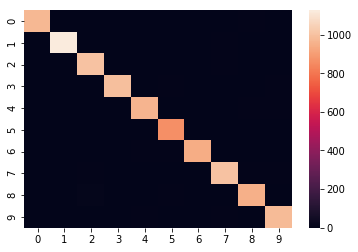

In [11]:
model.evaluate(x_test, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=model.predict(x_test), axis=1), y_test )
sn.heatmap( confusion )